In [6]:
import sys, os

# Add project_root to sys.path so Python can find `scripts/`
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [7]:
from neuralprophet import NeuralProphet, set_random_seed, set_log_level
from scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.helper import CustomizedLoss
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

set_random_seed(0)
# Disable logging messages unless there is an error
set_log_level("ERROR")


In [8]:
def modify(df, forecast=5):
    # figure out where 'yhat1' lives
    col_idx = df.columns.get_loc('yhat1')

    # loop 1…9
    for i in range(1, forecast):
        # compute which yhatN we need
        which = forecast - i + 1          # 10→1, 9→2, …, 2→9
        val   = df.iloc[-i][f'yhat{which}'] 
        # row number = -i (so i=1 → last row, i=9 → 9th-from-last)
        df.iat[-i, col_idx] = val

    j = 0
    for i in range(forecast+1, forecast+6):
        which = min(5, forecast - j +1)
        print(which)
        print(df.iloc[-i]['ds'])

        val = df.iloc[-i][f'yhat{which}']
        df.iat[-i, col_idx] = val
        j += 1

In [9]:

# 1) Instantiate a NeuralProphet model that learns from the past 60 days (n_lags)
#    to forecast the next 10 days (n_forecasts), with trend + all seasonalities on.
m = NeuralProphet(
    n_lags=45,                 # look back this many days as inputs
    n_forecasts=5,            # predict this many days ahead
    yearly_seasonality=True,   # model an annual cycle
    weekly_seasonality=True,   # model day-of-week cycle
    daily_seasonality=False,    # if intra-day data; set False for daily only
    seasonality_mode='additive',
    n_changepoints=10,
    # you can also tweak trend flexibility:
    trend_reg=0.5,                  
    trend_reg_threshold=True,
    normalize='standardize',
    drop_missing=True,
)
m.set_plotting_backend("plotly-static")
# m.add_country_holidays('VN')

In [10]:
# 📂 Load dataset
file_path_1 = "../ready_data/cleaned_vn_index_data.csv"
df_1 = pd.read_csv(file_path_1)

# df_1.drop(columns=['Index'], inplace=True)

df = (
    df_1[['Date', 'VN_Index_Close']].rename(columns={
          'Date': 'ds',
          'VN_Index_Close': 'y'
      })
)

# convert the 'ds' column to datetime
df['ds'] = pd.to_datetime(df['ds'])


In [20]:
df

,ds,y
0,2007-01-02,741.27
1,2007-01-03,757.71
2,2007-01-08,825.11
3,2007-01-09,844.91
4,2007-01-10,865.71
...,...,...
4304,2025-04-29,1226.30
4305,2025-05-05,1240.05
4306,2025-05-06,1241.95
4307,2025-05-07,1250.37


In [12]:
# m.add_lagged_regressor('Total Volume', normalize='standardize')

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/242 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

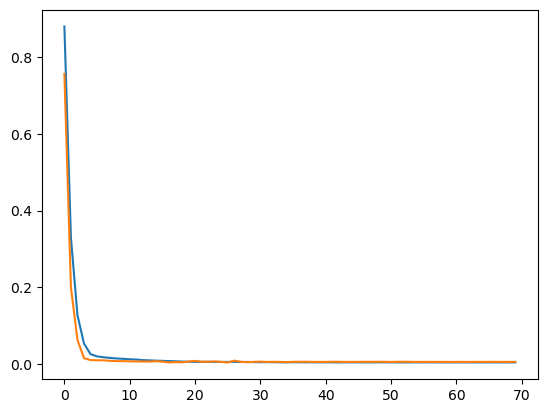

In [13]:
# 2) compute how many rows you need for validation
n_val = m.n_lags + m.n_forecasts  # must equal 60 + 10 = 70

# 3) split your DataFrame by row‐count
train_df = df.iloc[:-n_val]
val_df   = df.iloc[-n_val:]

# 4) fit using the fixed‐size validation set
metrics = m.fit(
    train_df,
    freq="B",
    validation_df=val_df,
    progress="plot",
)


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/data/split.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, future_df])



Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



           ds            y        yhat1        yhat2        yhat3  \
0  2025-02-24  1304.560000          NaN          NaN          NaN   
1  2025-02-25  1303.160000          NaN          NaN          NaN   
2  2025-02-26  1302.960000          NaN          NaN          NaN   
3  2025-02-27  1307.800000          NaN          NaN          NaN   
4  2025-02-28  1305.360000          NaN          NaN          NaN   
5  2025-03-03  1309.370000          NaN          NaN          NaN   
6  2025-03-04  1311.910000          NaN          NaN          NaN   
7  2025-03-05  1304.710000          NaN          NaN          NaN   
8  2025-03-06  1318.220000          NaN          NaN          NaN   
9  2025-03-07  1326.050000          NaN          NaN          NaN   
10 2025-03-10  1330.280000          NaN          NaN          NaN   
11 2025-03-11  1332.540000          NaN          NaN          NaN   
12 2025-03-12  1334.410000          NaN          NaN          NaN   
13 2025-03-13  1326.270000        

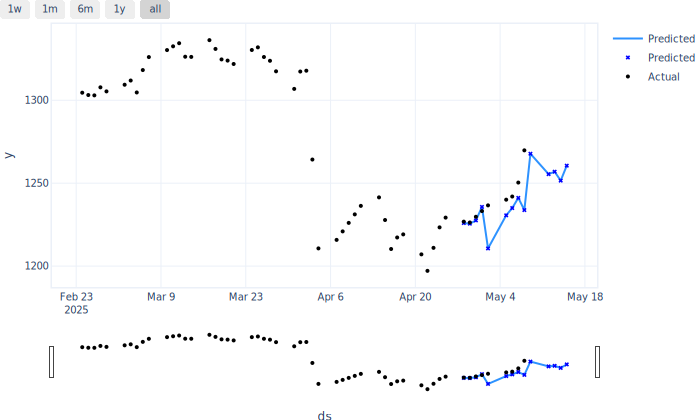

In [14]:
future = m.make_future_dataframe(df, periods=5, n_historic_predictions=False)
forecast = m.predict(future, auto_extend=False, raw=False)

print(forecast)
modify(forecast)
# Visualize the forecast
m.highlight_nth_step_ahead_of_each_forecast(step_number=1)
m.plot(forecast)

In [15]:
forecast.tail(11)

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,ar1,ar2,ar3,ar4,ar5,trend,season_yearly,season_weekly
48,2025-05-01,1233.1750,1235.697754,1224.602295,1216.932007,1218.506104,NaN,72.646873,61.551556,53.881165,55.455231,NaN,1189.812744,-12.410201,-14.351724
49,2025-05-02,1236.6125,1210.645020,1210.645020,1228.282715,1224.174072,1229.165649,13.589694,-10.800488,6.837266,2.728652,7.720213,1189.966064,-12.667153,44.146465
50,2025-05-05,1240.0500,1230.625977,1224.610107,1230.625977,1228.278198,1210.197754,-63.434246,-69.111458,-63.095654,-65.443466,-83.523827,1190.426147,-13.103772,116.399246
51,2025-05-06,1241.9500,1235.001953,1247.959717,1232.315674,1235.001953,1211.983276,-43.320728,-32.568508,-48.212528,-45.526226,-68.544922,1190.579468,-13.133309,103.082008
52,2025-05-07,1250.3700,1241.141479,1241.026611,1237.556641,1227.361938,1241.141479,41.698299,40.811687,37.341606,27.146936,40.926487,1190.732910,-13.106215,22.588354
53,2025-05-08,1269.8000,1233.781128,1237.511230,1238.479492,1224.290527,1233.781128,82.009964,73.914070,74.882317,60.693439,70.184013,1190.886108,-13.020273,-14.268738
54,2025-05-09,NaN,1267.770264,1236.289429,1247.468506,1251.687988,1223.478638,45.437683,13.956837,25.135921,29.355398,1.146053,1191.039551,-12.876964,44.170025
55,2025-05-12,NaN,1255.456543,1255.456543,1249.276733,1253.760132,1244.364868,NaN,-40.210266,-46.390091,-41.906715,-51.301987,1191.499512,-12.113375,116.280685
56,2025-05-13,NaN,1256.926270,NaN,1256.926270,1239.073730,1249.481445,NaN,NaN,-25.926641,-43.779202,-33.371513,1191.652954,-11.752819,102.952820
57,2025-05-14,NaN,1251.542969,NaN,NaN,1251.542969,1245.553955,NaN,NaN,NaN,48.611244,42.622280,1191.806152,-11.342951,22.468437


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




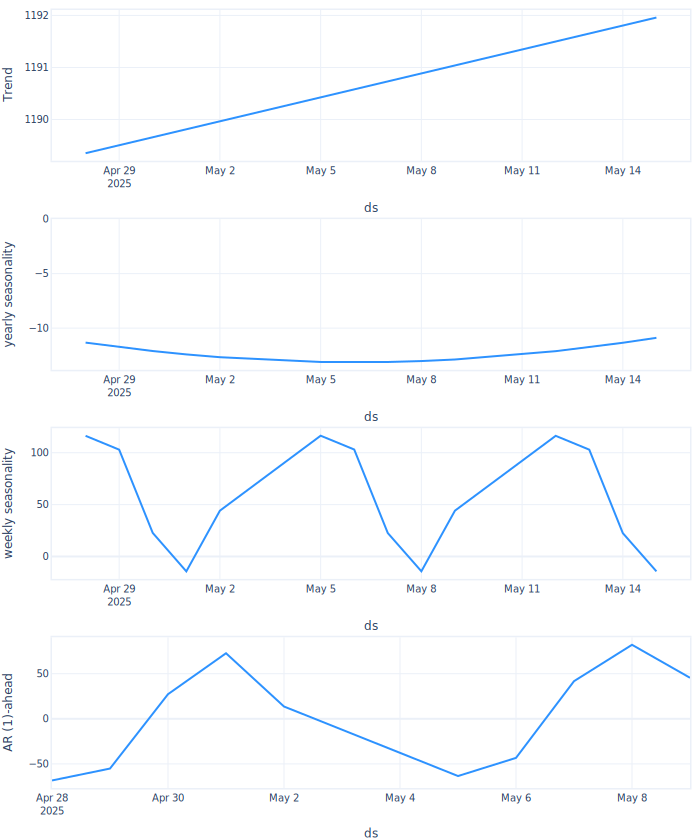

In [16]:
m.plot_components(forecast)

In [17]:
forecast.tail(12)

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,ar1,ar2,ar3,ar4,ar5,trend,season_yearly,season_weekly
47,2025-04-30,1229.7375,1227.539062,1248.128052,1218.590088,NaN,NaN,27.271690,47.860786,18.322798,NaN,NaN,1189.659424,-12.100281,22.708157
48,2025-05-01,1233.1750,1235.697754,1224.602295,1216.932007,1218.506104,NaN,72.646873,61.551556,53.881165,55.455231,NaN,1189.812744,-12.410201,-14.351724
49,2025-05-02,1236.6125,1210.645020,1210.645020,1228.282715,1224.174072,1229.165649,13.589694,-10.800488,6.837266,2.728652,7.720213,1189.966064,-12.667153,44.146465
50,2025-05-05,1240.0500,1230.625977,1224.610107,1230.625977,1228.278198,1210.197754,-63.434246,-69.111458,-63.095654,-65.443466,-83.523827,1190.426147,-13.103772,116.399246
51,2025-05-06,1241.9500,1235.001953,1247.959717,1232.315674,1235.001953,1211.983276,-43.320728,-32.568508,-48.212528,-45.526226,-68.544922,1190.579468,-13.133309,103.082008
52,2025-05-07,1250.3700,1241.141479,1241.026611,1237.556641,1227.361938,1241.141479,41.698299,40.811687,37.341606,27.146936,40.926487,1190.732910,-13.106215,22.588354
53,2025-05-08,1269.8000,1233.781128,1237.511230,1238.479492,1224.290527,1233.781128,82.009964,73.914070,74.882317,60.693439,70.184013,1190.886108,-13.020273,-14.268738
54,2025-05-09,NaN,1267.770264,1236.289429,1247.468506,1251.687988,1223.478638,45.437683,13.956837,25.135921,29.355398,1.146053,1191.039551,-12.876964,44.170025
55,2025-05-12,NaN,1255.456543,1255.456543,1249.276733,1253.760132,1244.364868,NaN,-40.210266,-46.390091,-41.906715,-51.301987,1191.499512,-12.113375,116.280685
56,2025-05-13,NaN,1256.926270,NaN,1256.926270,1239.073730,1249.481445,NaN,NaN,-25.926641,-43.779202,-33.371513,1191.652954,-11.752819,102.952820


In [18]:
result = forecast[['ds', 'yhat1']].tail(5).rename(columns={
          'ds': 'Date',
          'yhat1': 'VN_Index_Close'
      })
result.to_csv(f'../result_{m.n_lags}.xlsx')